In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Import libraries**

In [1]:
import warnings
warnings.filterwarnings("ignore")
from os import listdir
from pickle import dump
import tensorflow as tf
from keras.applications import EfficientNetV2L
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
from keras.models import Model
import pandas as pd
import tensorflow as tf 

# **Encoder part**

In [2]:
def extract_features(directory):
    model = EfficientNetV2L()
    model.layers.pop()
    model = Model(inputs = model.inputs,outputs = model.layers[-1].output)
    print(model.summary())
    features = dict()
    for name in listdir(directory):
        filename = directory +'/'+ name
        image = load_img(filename,target_size = (480,480))
        image = img_to_array(image)
        image = image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
        image = preprocess_input(image)
        feature = model.predict(image,verbose=1)
        image_id = name.split('.')[0]
        features[image_id] = feature
        print("image name is : "+name)
    return features

# **Extract feature from images**

In [ ]:
features = dict()
features = extract_features('/kaggle/input/flickr-image-dataset/flickr30k_images/flickr30k_images/flickr30k_images/')


In [ ]:
print(len(features))

In [ ]:
WORKING_DIR = '/kaggle/working'

In [ ]:
# store features in pickle
import os
import pickle
pickle.dump(features, open(os.path.join(WORKING_DIR, 'features.pkl'), 'wb'))

# **Run code from here**

# **import lib**

In [2]:
from os import listdir
from pickle import dump
import tensorflow as tf
from keras.applications import EfficientNetV2L
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
from keras.models import Model
import pandas as pd

In [23]:
# load features from pickle
import os
import pickle
with open(os.path.join('/kaggle/input/features/', 'features.pkl'), 'rb') as f:
    features = pickle.load(f)
    
print(features['10002456'].shape[0])
print(features['1000268201'].shape[1])

1
1000


In [24]:
print(features['1003163366'])

[[2.40036796e-04 2.50089128e-04 1.42428413e-04 1.28920874e-04
  3.37882520e-04 2.13011139e-04 1.09376168e-04 2.03749616e-04
  1.87401005e-04 1.94733206e-04 3.14412522e-04 2.04968572e-04
  3.77863093e-04 3.73190793e-04 3.27533693e-04 3.30522802e-04
  3.00364802e-04 3.13947676e-04 7.81609036e-04 2.59773456e-04
  1.50944557e-04 2.50032957e-04 2.85705290e-04 3.30389012e-04
  3.88387271e-04 1.93169879e-04 2.56786763e-04 2.85729388e-04
  2.97735038e-04 2.79871601e-04 1.50268141e-04 3.06286471e-04
  2.68580014e-04 1.34183501e-04 1.92248583e-04 3.45725508e-04
  3.96450923e-04 2.92044511e-04 3.35021847e-04 4.68483777e-04
  2.57183565e-04 3.87560664e-04 2.59355700e-04 3.77063727e-04
  2.21588358e-04 3.02625471e-04 3.17024213e-04 3.88339307e-04
  2.70801160e-04 2.67306954e-04 2.34123188e-04 2.79304862e-04
  3.03544657e-04 1.91408792e-04 3.50925693e-04 2.10392114e-04
  2.17365858e-04 2.45023577e-04 3.08919756e-04 3.93643422e-04
  1.59209827e-04 3.37589590e-04 2.17775349e-04 2.56809784e-04
  2.6530

# **Data PreProcessing**

In [4]:
with open(os.path.join('/kaggle/input/f-results/', 'results_Copy.txt'), 'r') as f:
    next(f)
    desc = f.read()

In [5]:
#import lib we need
import string
from tqdm.notebook import tqdm

In [6]:
import string

# load doc into memory
def load_document(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# extract descriptions for images
def load_descriptions(doc):
	mapping = dict()
	# process lines
	for line in doc.split('\n'):
		# split line by white space
		if '"' in line:
			line = line.replace('"','')
		tokens = line.split()
		if len(line) < 2:
			continue
		# take the first token as the image id, the rest as the description
		image_id, image_desc = tokens[0], tokens[1:]
		# remove filename from image id
		image_id = image_id.split('.')[0]
		# convert description tokens back to string
		image_desc = ' '.join(image_desc)
		# create the list if needed
		if image_id not in mapping:
			mapping[image_id] = list()
		# store description
		mapping[image_id].append(image_desc)
	return mapping

def clean_descriptions(descriptions):
	# prepare translation table for removing punctuation
	table = str.maketrans('', '', string.punctuation)
	d_list = []   
	for key, desc_list in descriptions.items():      
		for i in range(len(desc_list)):
			desc = desc_list[i]
			# tokenize
			desc = desc.split()
			# convert to lower case
			desc = [word.lower() for word in desc]
			# remove punctuation from each token
			desc = [w.translate(table) for w in desc]
			# remove hanging 's' and 'a'
			desc = [word for word in desc if len(word)>1]
			# remove tokens with numbers in them
			desc = [word for word in desc if word.isalpha()]
			# store as string
			desc_list[i] =  "startseq " +' '.join(desc) +" endseq"
		d_list.append(desc_list)
	return d_list
# convert the loaded descriptions into a vocabulary of words
def to_vocabulary(descriptions):
	# build a list of all description strings
	all_desc = set()
	for key in descriptions.keys():
		[all_desc.update(d.split()) for d in descriptions[key]]
	return all_desc

# save descriptions to file, one per line
def save_descriptions(descriptions, filename):
	lines = list()
	for key, desc_list in descriptions.items():
		for desc in desc_list:
			lines.append(key + ' ' + desc)
	data = '\n'.join(lines)
	file = open(filename, 'w')
	file.write(data)
	file.close()

# filename = 'Flickr8k_text/Flickr8k.token.txt'
filename = '/kaggle/input/f-results/results_Copy.txt'
# load descriptions
doc = load_document(filename)
# parse descriptions
descriptions = load_descriptions(doc)
print('Loaded: %d ' % len(descriptions))
#print(descriptions['10002456'])
# clean descriptions
clean_desc = clean_descriptions(descriptions)
# summarize vocabulary
vocabulary = to_vocabulary(descriptions)
print('Vocabulary Size: %d' % len(vocabulary))
# save to file
save_descriptions(descriptions, 'descriptions.txt')
print(clean_desc[0])

Loaded: 31783 
Vocabulary Size: 19737
['startseq two young guys with shaggy hair look at their hands while hanging out in the yard endseq', 'startseq two young white males are outside near many bushes endseq', 'startseq two men in green shirts are standing in yard endseq', 'startseq man in blue shirt standing in garden endseq', 'startseq two friends enjoy time spent together endseq']


In [7]:
print(len(clean_desc[2]))
print(clean_desc[:3])

5
[['startseq two young guys with shaggy hair look at their hands while hanging out in the yard endseq', 'startseq two young white males are outside near many bushes endseq', 'startseq two men in green shirts are standing in yard endseq', 'startseq man in blue shirt standing in garden endseq', 'startseq two friends enjoy time spent together endseq'], ['startseq several men in hard hats are operating giant pulley system endseq', 'startseq workers look down from up above on piece of equipment endseq', 'startseq two men working on machine wearing hard hats endseq', 'startseq four men on top of tall structure endseq', 'startseq three men on large rig endseq'], ['startseq child in pink dress is climbing up set of stairs in an entry way endseq', 'startseq little girl in pink dress going into wooden cabin endseq', 'startseq little girl climbing the stairs to her playhouse endseq', 'startseq little girl climbing into wooden playhouse endseq', 'startseq girl going into wooden building endseq']]

In [8]:
def to_lines(desc):
    all_desc =[]
    for des in desc :
        for d in des :
            all_desc.append(d)
    return all_desc

In [9]:
desc_lines = to_lines(clean_desc)
print(desc_lines[:10])

['startseq two young guys with shaggy hair look at their hands while hanging out in the yard endseq', 'startseq two young white males are outside near many bushes endseq', 'startseq two men in green shirts are standing in yard endseq', 'startseq man in blue shirt standing in garden endseq', 'startseq two friends enjoy time spent together endseq', 'startseq several men in hard hats are operating giant pulley system endseq', 'startseq workers look down from up above on piece of equipment endseq', 'startseq two men working on machine wearing hard hats endseq', 'startseq four men on top of tall structure endseq', 'startseq three men on large rig endseq']


In [11]:
from keras.preprocessing.text import Tokenizer
def create_tokenizer(descriptions):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(descriptions)
    return tokenizer

In [12]:
def max_length(descriptions):
    mxx = -1
    for desc in descriptions:
        mx = -1
        for d in desc:
            d_split = d.split()
            if len(d_split)>mx:
                mx = len(d_split)
        mxx = max(mxx,mx)
    return mxx

In [13]:
# prepare tokenizer
tokenizer = create_tokenizer(desc_lines)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_length = max_length(clean_desc)
print('Description Length: %d' % max_length)


Vocabulary Size: 19738
Description Length: 74


In [14]:
def features_to_list(features):
    feat =[]
    for key ,value in features.items():
        feat.append(value)
    return feat

In [15]:
feat_list = features_to_list(features)


In [16]:
print(feat_list[0].shape)

(1, 1000)


# **Data Split**

In [17]:
split = int(0.8*len(feat_list))
feat_train = feat_list[:split]
feat_test = feat_list[split:]
captions_train = clean_desc[:split]
captions_test = clean_desc[split:]

print(len(feat_train))
print(len(feat_test))
print(len(captions_train))
print(len(captions_test))

25426
6357
25426
6357


# **Data Generator**

In [18]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

def create_sequences(tokenizer, max_length, desc_list, feature):
    x_1, x_2, y = list(), list(), list()
    # move through each description for the image
    for desc in desc_list:
        # encode the sequence
        seq = tokenizer.texts_to_sequences([desc])[0]
        # divide one sequence into various X,y pairs
        for i in range(1, len(seq)):
                # divide into input and output pair
                in_seq, out_seq = seq[:i], seq[i]
                # pad input sequence
                in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                # encode output sequence
                out_seq = to_categorical([out_seq], num_classes=vocab_size, dtype ="int32")[0]
                # store
                x_1.append(feature)
                x_2.append(in_seq)
                y.append(out_seq)
    return np.array(x_1), np.array(x_2), np.array(y)

In [19]:
def data_generator(descriptions, features, tokenizer, max_length,batch_size):
    n = 0
    while 1:
        for i in range(len(descriptions)):
            n = n + 1
            #retrieve photo features
            feature = features[i].reshape(1000,)
            X1, X2, y = create_sequences(tokenizer, max_length, descriptions[i], feature)
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield [X1, X2], y
                X1, X2, y = list(), list(), list()
                n = 0
            #yield [[inp_image, inp_seq], op_word]

In [ ]:
""""
def data_generator(descriptions, features, tokenizer, max_length,batch_size):
    n = 0
    while 1:
        for i in range(len(descriptions)):
            n = n+1
            #retrieve photo features
            feature = features[i].reshape(1000,)
            X1, X2, y = create_sequences(tokenizer, max_length, descriptions[i], feature)
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                return X1, X2, y
                X1, X2, y = list(), list(), list()
                n = 0
            #yield [[inp_image, inp_seq], op_word]
"""

In [ ]:
x1 , x2 , y = data_generator(captions_train,feat_train, tokenizer, max_length,32)

print("the length of y[0] :" ,len(y[0]))
print("the length of y :" ,len(y))

print("the length of x1[0] :" ,len(x1[0]))
print("the length of x1 :" ,len(x1))

print("the length of x2[0] :",len(x2[0]))
print("the length of x2 :",len(x2))
#print(x1[0])
print(x1[0].shape)
x=x1[0].reshape(1000,)
print(x.shape)
print(len(x))

# **Create Model (Decoder Part)**

In [22]:
import numpy as np

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add , Flatten
from tensorflow.keras.optimizers.legacy import Adam

inputs1.shape : (None, 1000)
fe1.shape : (None, 1000)
fe2.shape : (None, 256)
inputs2.shape : (None, 74)
se1.shape : (None, 74, 256)
se2.shape : (None, 74, 256)
se3.shape : (None, 74, 512)
se4.shape : (None, 74, 512)
decoder.shape : (None, 256)
outputs.shape : (None, 19738)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1000)]       0           []                               
                                                                                                  
 dropout (Dropout)              (None, 1000)         0           ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, 74)]         0           []                               
                 

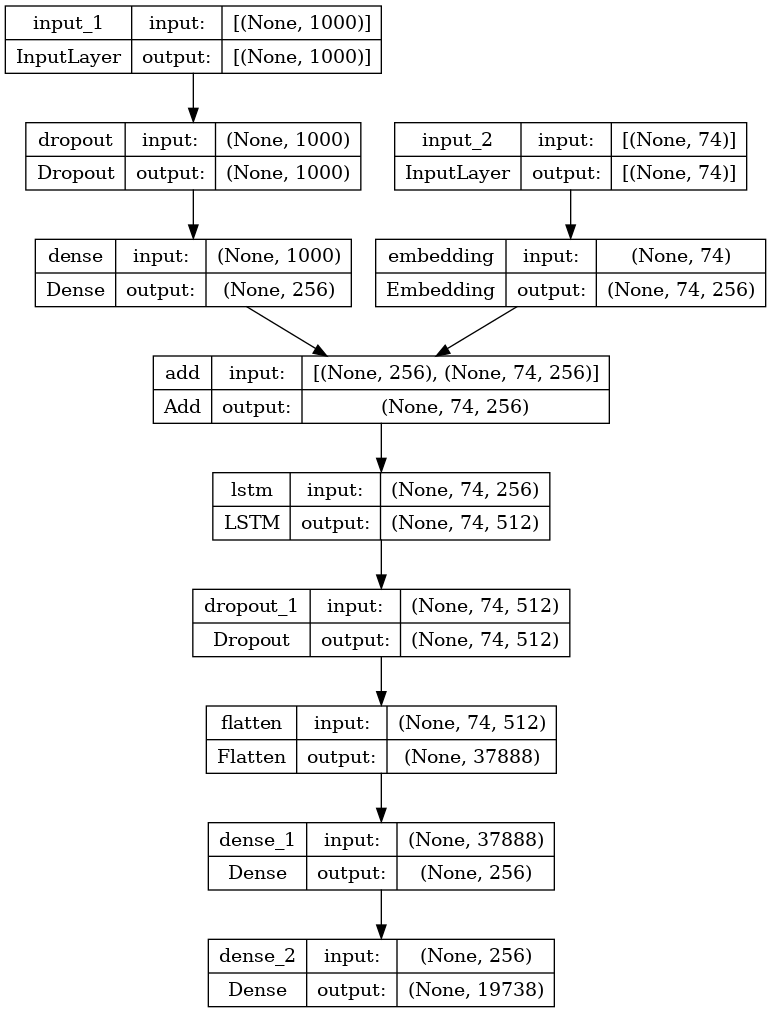

In [23]:
inputs1 = Input(shape=(1000,))
print("inputs1.shape :",inputs1.shape)

fe1 = Dropout(0.3)(inputs1)
print("fe1.shape :",fe1.shape)
fe2 = Dense(256, activation='relu')(fe1)
print("fe2.shape :",fe2.shape)

# LSTM sequence model

inputs2 = Input(shape=(max_length,))
print("inputs2.shape :",inputs2.shape)
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
print("se1.shape :",se1.shape)
se2 = add([fe2, se1])
print("se2.shape :",se2.shape)
se3 = (LSTM(512,return_sequences = True))(se2)
print("se3.shape :",se3.shape)
se4 = Dropout(0.5)(se3)
print("se4.shape :",se4.shape)

f=Flatten()(se4)
decoder = Dense(256, activation='relu')(f)
print("decoder.shape :",decoder.shape)
outputs = Dense(vocab_size, activation='softmax')(decoder)
print("outputs.shape :",outputs.shape)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='Adam' , metrics=['accuracy'])
# summarize model
print(model.summary())
plot_model(model, show_shapes=True)

# **Train Model**

In [1]:
# train our model
max_length = 74
vocab_size = 19738
batch_size = 32
epochs = 10
steps = len(feat_train) // batch_size
checkpoint_path = "/kaggle/working/cp_100.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
   checkpoint_path, verbose=1, save_weights_only=True,
   # Save weights, every epoch.
   save_freq=10*steps)
# creating a directory named models to save our models
for i in range(epochs):
    generator = data_generator(captions_train,feat_train, tokenizer, max_length,batch_size)
    history = model.fit(generator, epochs =1, steps_per_epoch= steps, verbose=1, callbacks=[checkpoint_callback])
    #j = j+1
    #model.save("model21/model_" + str(j) + ".h5")

NameError: name 'feat_train' is not defined

In [24]:
model.load_weights('/kaggle/working/cp_100.h5')

In [ ]:
generator = data_generator(captions_test,feat_test, tokenizer, max_length,batch_size)
model.evaluate(generator, verbose=1)

  11990/Unknown - 1335s 111ms/step - loss: 21.6826 - accuracy: 0.1357

# **Train model after increase layer**

inputs1.shape : (None, 1000)
fe1.shape : (None, 512)
fe2.shape : (None, 512)
inputs2.shape : (None, 74)
se1.shape : (None, 74, 512)
se2.shape : (None, 74, 512)
se3.shape : (None, 74, 512)
se4.shape : (None, 74, 512)
decoder1.shape : (None, 512)
decoder2.shape : (None, 256)
outputs.shape : (None, 19738)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 1000)]       0           []                               
                                                                                                  
 dense_2 (Dense)                (None, 512)          512512      ['input_3[0][0]']                
                                                                                                  
 input_4 (InputLayer)           [(None, 74)]         0           []                    

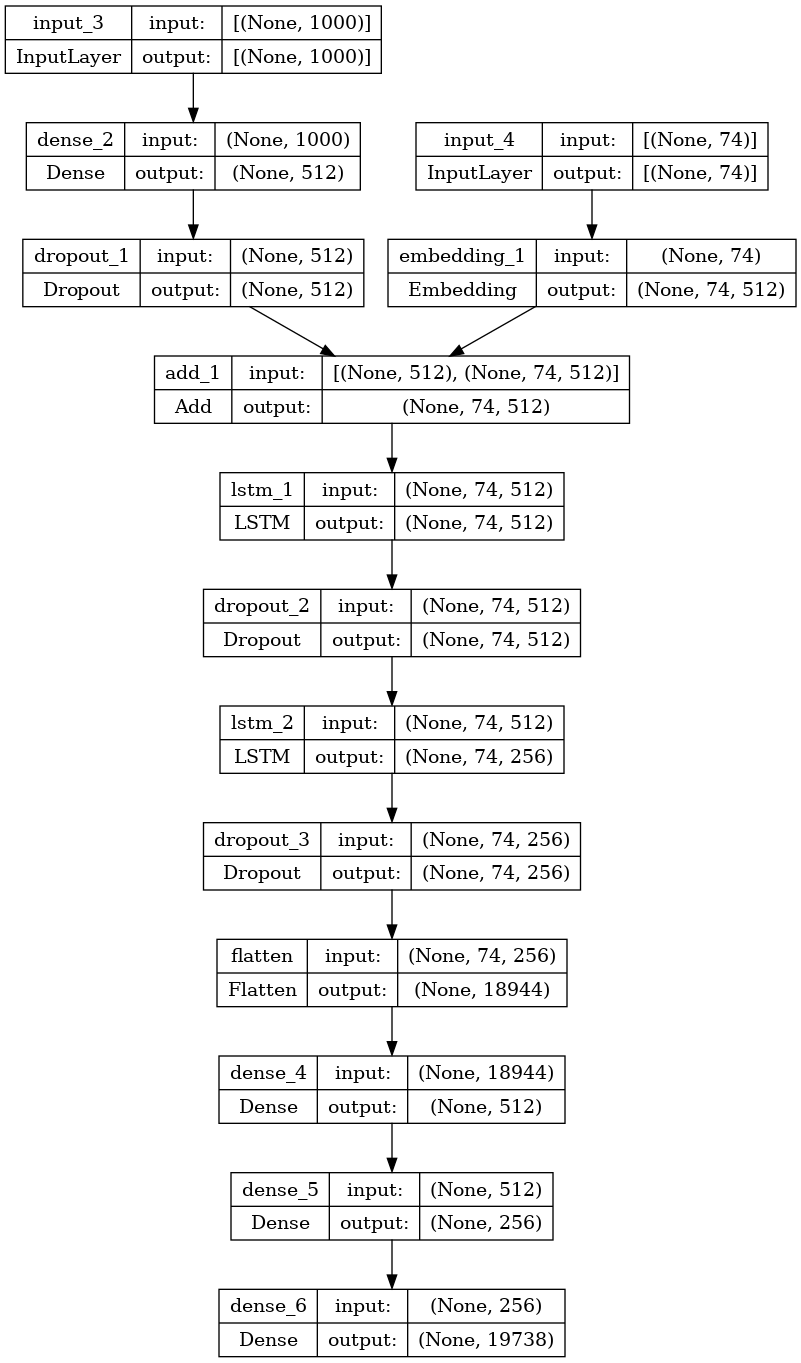

In [18]:
inputs1 = Input(shape=(1000,))
print("inputs1.shape :",inputs1.shape)


fe1 = Dense(512, activation='relu')(inputs1)
print("fe1.shape :",fe1.shape)
fe2 = Dropout(0.3)(fe1)
print("fe2.shape :",fe2.shape)
fe3 = Dense(256, activation='relu')(fe2)

# LSTM sequence model

inputs2 = Input(shape=(max_length,))
print("inputs2.shape :",inputs2.shape)
se1 = Embedding(vocab_size, 512, mask_zero=True)(inputs2)
print("se1.shape :",se1.shape)
se2 = add([fe2, se1])
print("se2.shape :",se2.shape)
se3 = (LSTM(512,return_sequences = True))(se2)
print("se3.shape :",se3.shape)
se4 = Dropout(0.3)(se3)
print("se4.shape :",se4.shape)
se5 = (LSTM(256,return_sequences = True))(se4)
se6 = Dropout(0.5)(se5)

f=Flatten()(se6)
decoder1 = Dense(512, activation='relu')(f)
print("decoder1.shape :",decoder1.shape)
decoder2 = Dense(256, activation='relu')(decoder1)
print("decoder2.shape :",decoder2.shape)
outputs = Dense(vocab_size, activation='softmax')(decoder2)
print("outputs.shape :",outputs.shape)

model1 = Model(inputs=[inputs1, inputs2], outputs=outputs)
model1.compile(loss='categorical_crossentropy', optimizer='Adam' , metrics=['accuracy'])
# summarize model
print(model1.summary())
plot_model(model1, show_shapes=True)

In [32]:
model1.load_weights('/kaggle/working/cp-0001.h5')

In [ ]:
# train our model
checkpoint_path = "/kaggle/working/cp-{epoch:04d}.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)
max_length = 74
vocab_size = 19738
batch_size = 32
epochs = 1
steps = len(feat_train) // batch_size
# creating a directory named models to save our models
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
   checkpoint_path, verbose=1, save_weights_only=True,
   # Save weights, every epoch.
   save_freq=10*steps)
for i in range(epochs):
    print('Epoch Num: '+str(i+1))
    generator = data_generator(captions_train,feat_train, tokenizer, max_length,batch_size)
    history = model1.fit(generator, epochs =2, steps_per_epoch= steps, verbose=1, callbacks=[checkpoint_callback])
    #j = j+1
    #model.save("model21/model_" + str(j) + ".h5")

In [15]:
generator = data_generator(captions_test,feat_test, tokenizer, max_length,batch_size)
model1.evaluate(generator, verbose=1)

NameError: name 'model1' is not defined

# **555**

In [39]:
mapping = dict()
# process lines
for line in doc.split('\n'):
  # split line by white space
  if '"' in line:
    line = line.replace('"','')
  tokens = line.split()
  if len(line) < 2:
    continue
  # take the first token as the image id, the rest as the description
  image_id, image_desc = tokens[0], tokens[1:]
  # remove filename from image id
  image_id = image_id.split('.')[0]
  # convert description tokens back to string
  image_desc = ' '.join(image_desc)
  # create the list if needed
  if image_id not in mapping:
    mapping[image_id] = list()
  # store description
  mapping[image_id].append(image_desc)

In [1]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [3]:
def predict_caption(model, image, tokenizer, max_length):
    # add start tag for generation process
    in_text = 'startseq'
    # iterate over the max length of sequence
    for i in range(max_length):
        # encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad the sequence
        sequence = pad_sequences([sequence], max_length)
        # predict next word
        yhat = model.predict([image, sequence], verbose=0)
        # get index with high probability
        yhat = np.argmax(yhat)
        # convert index to word
        word = idx_to_word(yhat, tokenizer)
        # stop if word not found
        if word is None:
            break
        # append word as input for generating next word
        in_text += " " + word  # stop if we reach end tag
        if word == 'endseq':
            break
    return in_text

In [28]:
from PIL import Image
import matplotlib.pyplot as plt
def generate_caption(image_name):
    BASE_DIR ='/kaggle/input/flickr-image-dataset/flickr30k_images/flickr30k_images/'
    # load the image
    # image_name = "1001773457_577c3a7d70.jpg"
    image_id = image_name.split('.')[0]
    img_path = os.path.join(BASE_DIR, image_name)
    image = Image.open(img_path)
    captions = mapping[image_id]
    print('---------------------Actual---------------------')
    for caption in captions:
        print(caption)
    # predict the caption
    y_pred = predict_caption(model1, features[image_id], tokenizer, max_length)
    print('--------------------Predicted--------------------')
    print(y_pred)
    plt.imshow(image)

---------------------Actual---------------------
0| An asian man wearing a black suit stands near a dark-haired woman and a brown-haired woman .;
1| Three people are standing outside near large pipes and a metal railing .;
2| A young woman walks past two young people dressed in hip black outfits .;
3| A woman with a large purse is walking by a gate .;
4| Several people standing outside a building .;
--------------------Predicted--------------------
startseq man in blue suit is walking down the street endseq


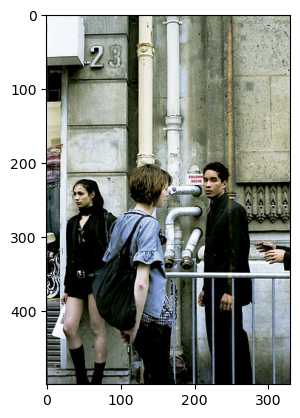

In [36]:
generate_caption('1001465944.jpg')